In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

In [2]:
image_height = 400
image_width = 600
dpi = 100

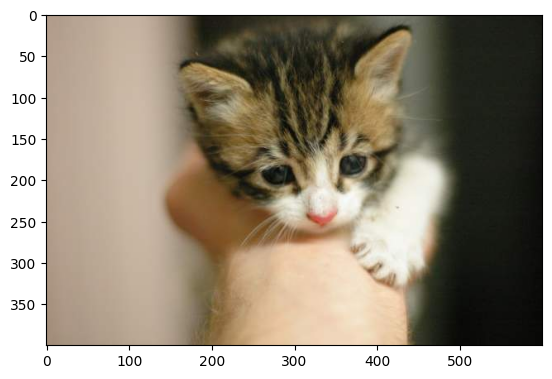

In [3]:
url = f"https://placekitten.com/{image_width}/{image_height}"
img = io.imread(url)
plt.imshow(img)

# Задание для новеньких

Создайте свой собственный фильтр через инициализацию матрицу в numpy и примените его к изображению с помощью функции `cv2.filter2D`. Этот фильтр не должен копировать матрицу, представленные в стандартных функциях библиотеки opencv. Экспериментируйте, попробуйте добиться какого-то определенного эффекта или объясните полученный в результате поиска собственной матрицы.

Требования к заданию:
1. матрица не повторяет фильтр, представленные на занятии
2. вы продемонстрировали результат применения собственного фильтра в сравнении с реализованным в open cv
3. вы можете объяснить, какого эффекта добились и почему

Критерии оценки:
* оценка 3: выполнен пункт 1
* оценка 4: выполнены пункты 1-2
* оценка 5: выполнены пункты 1-3

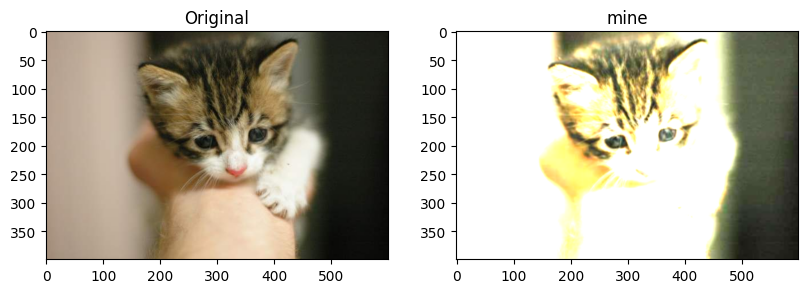

In [4]:

kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)

kernel = np.array([[.3,.0,.7],
                   [.3,.0,.7],
                   [.3,.0,.7]])

ddepth = -1

dst = cv2.filter2D(img, ddepth, kernel)



plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(dst), plt.title('mine')
plt.show()


# Задание для смешариков

Напишите алгоритм выделения границ контрастного объекта на изображении с использованием цветовой гистограммы и порога.

Сегментация изображения:
1. Переведите изображение в цветовое пространство HSV
2. Проанализируйте гистограмму изображения и выберите min, max пороговое значение, чтобы сегментировать контрастный объект.
3. Внедрите применение порога обработку, чтобы сегментировать контрастный объект.
4. Реализуйте обнаружение границ с помощью фильтра Кэнни. Примените фильтр Гаусса перед обнаружением границ. Оцените результат
5. Приметие алгортим выделения границ с помощью вычетания: взять изображение, размыть его Гауссом с большой апертурой, например, 49, а потом вычесть
получившееся изображение из исходного. Должны выделится границы. Сравните с Canny.
6. Примените полученные алгорим к реальному видео с камеры. Проверьте его на реальном объекте

Критерии оценки:   
3 реализованы пункты 1-4   
4 реализованы пункты 1-5  
5 реализованы пункты 1-6   

# Алгоритм HSV + Canny

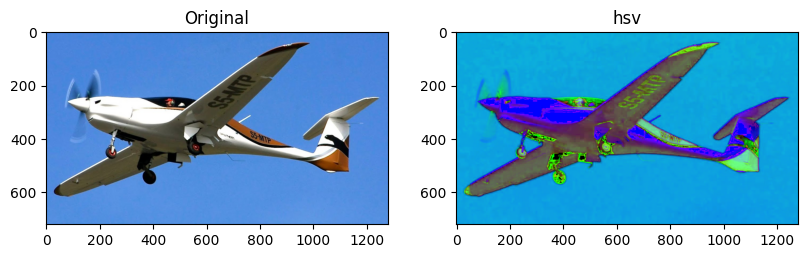

In [5]:
img = io.imread('plane.jpg')


hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(hsv_img), plt.title('hsv')
plt.show()

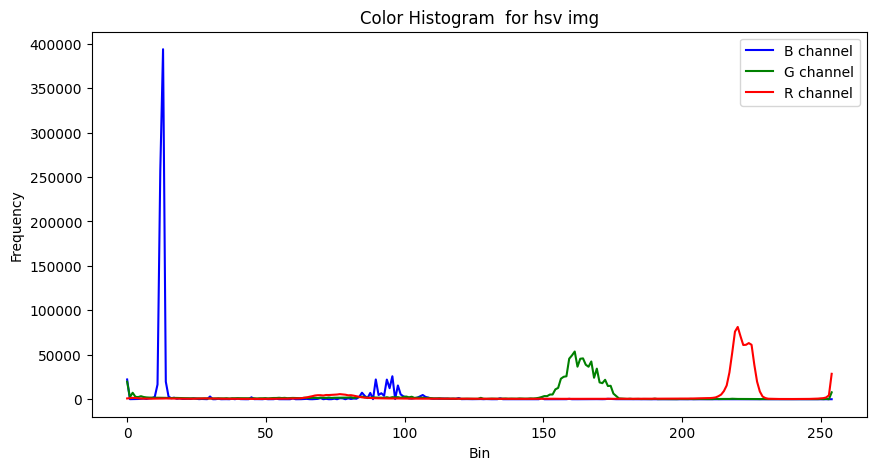

In [6]:
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 5))
plt.title('Color Histogram  for hsv img')
plt.xlabel('Bin')
plt.ylabel('Frequency')

for i, col in enumerate(colors):
    histogram, bin_edges = np.histogram(
        hsv_img[:, :, i], bins=256, range=(0, 255)
    )
    plt.plot(bin_edges[0:-1], histogram, color=col, label=f'{col.upper()} channel')

plt.legend()
plt.show()

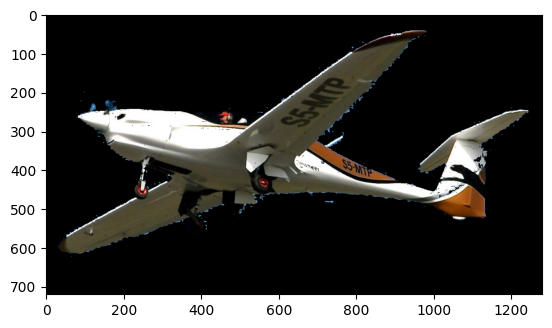

In [7]:
b_channel_border_from_1 = 0
b_channel_border_to_1 = 3

b_channel_border_from_2 = 15
b_channel_border_to_2 = 255

g_channel_border_from = 0
g_channel_border_to = 255

r_channel_border_from = 0
r_channel_border_to = 255


# хочу сделать 2 отрезка значений цветов по которым отфильтруем


from_color_1 = ( b_channel_border_from_1, g_channel_border_from, r_channel_border_from)
to_color_1 = ( b_channel_border_to_1, g_channel_border_to, r_channel_border_to)


from_color_2 = ( b_channel_border_from_2, g_channel_border_from, r_channel_border_from)
to_color_2 = ( b_channel_border_to_2, g_channel_border_to, r_channel_border_to)



mask_1 = cv2.inRange(hsv_img, from_color_1, to_color_1)
mask_2 = cv2.inRange(hsv_img, from_color_2, to_color_2)
mask_final = mask_1 | mask_2

result = cv2.bitwise_and(img, img, mask=mask_final)
plt.imshow(result)

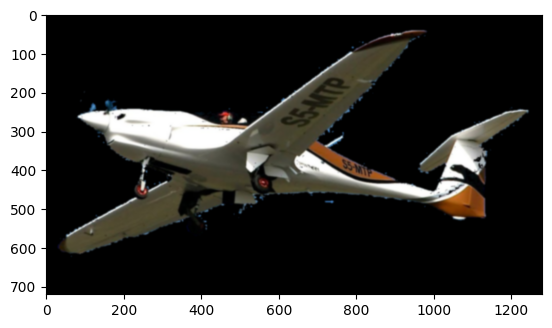

In [8]:

result_blurred = cv2.GaussianBlur(result, (9, 9), 0)

plt.imshow(result_blurred)

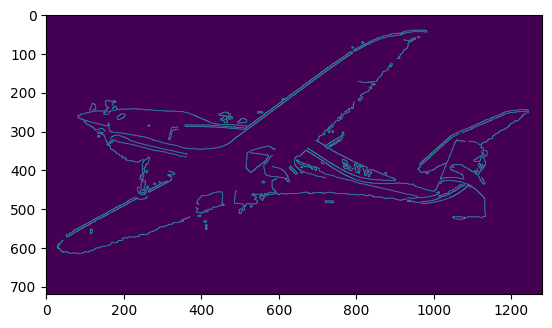

In [9]:
canny_edges = cv2.Canny(result_blurred, 50, 200)

plt.imshow(canny_edges)

# Алгоритм разность кадров

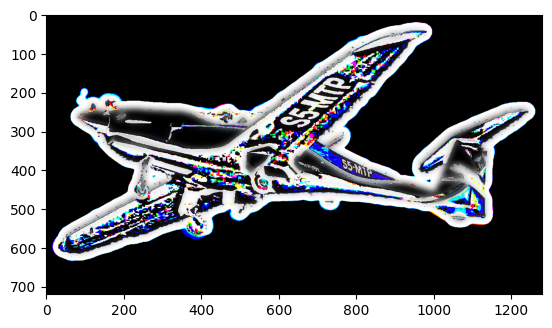

In [10]:

result_blurred = cv2.GaussianBlur(result, (49, 49), 0)
frame_diff_edges = result - result_blurred

plt.imshow(frame_diff_edges)

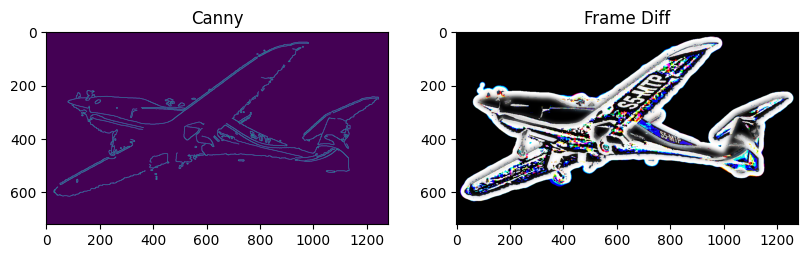

In [11]:

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(canny_edges), plt.title('Canny')
plt.subplot(132), plt.imshow(frame_diff_edges), plt.title('Frame Diff')
plt.show()

Картинка с камеры

In [12]:
def cannyAlgo(frame: cv2.Mat):

    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    mask_1 = cv2.inRange(frame_hsv, from_color_1, to_color_1)
    mask_2 = cv2.inRange(frame_hsv, from_color_2, to_color_2)
    mask_final = mask_1 | mask_2

    frame = cv2.bitwise_and(frame, frame, mask=mask_final)

    frame_blurred = cv2.GaussianBlur(frame, (9, 9), 0)

    frame_canny_edges = cv2.Canny(frame_blurred, 50, 200)

    return frame_canny_edges

In [13]:
def frameDiffAlgo(frame: cv2.Mat):

    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask_1 = cv2.inRange(frame_hsv, from_color_1, to_color_1)
    mask_2 = cv2.inRange(frame_hsv, from_color_2, to_color_2)
    mask_final = mask_1 | mask_2

    frame = cv2.bitwise_and(frame, frame, mask=mask_final)


    frame_blurred = cv2.GaussianBlur(frame, (49, 49), 0)
    frame_diff_edges = frame - frame_blurred

    return frame_diff_edges


In [14]:
cam = cv2.VideoCapture(2)

while True:
    _, frame = cam.read()

    canny_frame = cannyAlgo(frame.copy())
    frame_diff_frame = frameDiffAlgo(frame.copy())


    cv2.imshow('canny_frame', canny_frame)
    cv2.imshow('frame_diff_frame', frame_diff_frame)
    
    
    if cv2.waitKey(1) == ord('q'):
        break


cam.release()
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/oleg/.local/lib/python3.10/site-packages/cv2/qt/plugins"
